In [429]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Resultados y Discusiones

## preprocesamiento y EDA

In [430]:
#Las siguientes columnas se eliminarán del dataset por proteccion de datos personales.
personal_info = ['AIDM', 'ID_WEB', 'PIDM', 'PERIODO', 'NUM_SOLICITUD', 'APELLIDOS', 'PRIMER_NOMBRE', 'SEGUNDO_NOMBRE', 'FECHA_NACIMIENTO', 'TIPO_DOCUMENTO', 'No_DOCUMENTO', 'LUGAR_EXPEDICION', 'FECHA_EXPEDICION', 'DESC_DIRECCION_1', 'DIRECCION1_LINEA1', 'DIRECCION1_LINEA2', 'DIRECCION1_LINEA3', 'TEL_PERMANENTE', 'CELULAR', 'TEL_CASA_ACUDIENTE', 'TEL1_OFICINA', 'EMAIL_PARTICULAR', 'EMAIL_UNINORTE', 'NIVEL', 'DESC_ESTADO_SOLICITUD', 'FECHA_ESTADO_SOLICITUD', 'TIPO_ADMISION', 'DESC_TIPO_ADMISION', 'DESC_TIPO_ESTUDIANTE', 'PERIODO_CATALOGO', 'PROGRAMA1', 'Div1', 'ESPECIALIDAD1_1', 'ESPECIALIDAD2_1', 'SEGUNDA_OPCION', 'PROGRAMA2_SGASTDN', 'DESC_PROGRAMA2_SGASTDN', 'COD_BACHILLERATO', 'SNP', 'ESPECIALIDAD_ANT_1', 'ESPECIALIDAD_ANT_2', 'EMAIL_EMAIL_MADRE', 'EMAIL_PADRE', 'TELEFONO_MADRE', 'TELEFONO_PADRE', 'NUMERO_PASAPORTE', 'PAIS_PASAPORTE', 'FECHA_VENCIMIENTO_PASAPORTE', 'TIPO_VISA', 'DESC_VISA', 'NUMERO_VISA', 'FECHA_INICIO_VISA', 'FECHA_VENCIMIENTO_VISA', 'Quiere_Vacacional', 'RETENCION_DB', 'FECHA_RETENCION_DB', 'TARIFA_SGASTDN', 'doc_presento_icfes', 'EPS', 'NOMBRE_MADRE', 'TELEFONO_MADRE_', 'NOMBRE_PADRE', 'CODIGO_DANE','TELEFONO_PADRE_', 'NOMBRE_ACUDIENTE', 'CORREO_ACUDIENTE', 'Program_Insc', 'Zip1','CLASE']


### Lectura del Dataset

In [431]:
dir='data_inscripciones.csv'
df=pd.read_csv(dir, sep=';')
df.drop('Unnamed: 0', axis=1, inplace=True)
#Elimino columnas por protección de datos personales y otras variables irrelevantes para este estudio.
df.drop(personal_info, axis=1, inplace=True)

### Analisis Exploratorio

Tamaño del dataframe

In [432]:
df.shape

(76214, 67)

Contenido del dataframe

In [433]:
df.head(5)

,DISCAPACIDAD,IND_COMPLETA,IND_ACEPTADA,Ind_Sol_01_69_75,ULTIMO_PERIODO_ACADEMICO,IND_MATRICULADO,CODIGO,EDAD,SEXO,CIUDADANIA,...,DPTO_NACIMIENTO,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,IDIOMA_NATIVO,GRUPO_ETNICO,Beneficiario_Beca_Gobierno,FECHA_CREACION_INSC,FECHA_FINALIZACION_INSC,ATRIBUTO_SGASADD,Promedio_Notas_Bachillerato
0,NaN,Y,N,N,NaN,NaN,200091046.0,24.0,F,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
1,NaN,Y,N,N,NaN,NaN,200091019.0,24.0,F,C,...,Bolivar,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
2,00: Ninguno,Y,Y,N,202030.0,S,200090886.0,23.0,M,C,...,Bolivar,Colombia,Colombia,Español,Afrocolombianos,No,NaN,NaN,NaN,NaN
3,NaN,Y,Y,N,NaN,NaN,200090864.0,25.0,F,C,...,Cordoba,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
4,00: Ninguno,Y,Y,Y,201610.0,S,200019700.0,32.0,F,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,NaN,NaN,NaN,NaN


Columnas o ´Features´ que contiene mi dataframe

Revision de tipos de datos y nulos.

In [434]:
from prettytable import PrettyTable
def df_explore(df):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Column',
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     ])

    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),

                  ])
    print(t)
    print()
    return

df_explore(df)

Shape:  (76214, 67)


+-----------------------------+---------+----------+-------+--------+
|            Column           |   Type  | Non-Null | Nulls | Unique |
+-----------------------------+---------+----------+-------+--------+
|         DISCAPACIDAD        |  object |  69846   |  6368 |   14   |
|         IND_COMPLETA        |  object |  76214   |   0   |   4    |
|         IND_ACEPTADA        |  object |  76214   |   0   |   4    |
|       Ind_Sol_01_69_75      |  object |  76214   |   0   |   4    |
|   ULTIMO_PERIODO_ACADEMICO  | float64 |  34562   | 41652 |   58   |
|       IND_MATRICULADO       |  object |  29216   | 46998 |   4    |
|            CODIGO           | float64 |  76214   |   0   | 59754  |
|             EDAD            |  object |  76206   |   8   |   83   |
|             SEXO            |  object |  76211   |   3   |   7    |
|          CIUDADANIA         |  object |  76206   |   8   |   5    |
|          ATRIBUTOS          |  object |  40188   | 36026 |  523   |
|          DESC_DPTO

Las columnas que se llaman `DESC_EXAMEN` en realidad contienen el nombre del área evaluada en la prueba SABER 11 cuyo resultado está en la columna `Puntaje`. Eliminaremos las columnas DESC_EXAMEN y ajustaremos los nombres de las columnas `puntaje`

In [435]:
df= df.rename({
    'PUNTAJE13': 'GLOBAL',
    'PUNTAJE14': 'MATEMATICAS',
    'PUNTAJE15': 'LECTURA',
    'PUNTAJE16': 'SOCIALES',
    'PUNTAJE17': 'NATURALES',
    'PUNTAJE18': 'INGLES'
},
axis=1)

In [436]:
col_del=['DESC_EXAMEN13', 'DESC_EXAMEN14', 'DESC_EXAMEN15', 'DESC_EXAMEN16', 'DESC_EXAMEN17', 'DESC_EXAMEN18']
df= df.drop(col_del, axis=1)

In [437]:
df.head(5)

,DISCAPACIDAD,IND_COMPLETA,IND_ACEPTADA,Ind_Sol_01_69_75,ULTIMO_PERIODO_ACADEMICO,IND_MATRICULADO,CODIGO,EDAD,SEXO,CIUDADANIA,...,DPTO_NACIMIENTO,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,IDIOMA_NATIVO,GRUPO_ETNICO,Beneficiario_Beca_Gobierno,FECHA_CREACION_INSC,FECHA_FINALIZACION_INSC,ATRIBUTO_SGASADD,Promedio_Notas_Bachillerato
0,NaN,Y,N,N,NaN,NaN,200091046.0,24.0,F,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
1,NaN,Y,N,N,NaN,NaN,200091019.0,24.0,F,C,...,Bolivar,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
2,00: Ninguno,Y,Y,N,202030.0,S,200090886.0,23.0,M,C,...,Bolivar,Colombia,Colombia,Español,Afrocolombianos,No,NaN,NaN,NaN,NaN
3,NaN,Y,Y,N,NaN,NaN,200090864.0,25.0,F,C,...,Cordoba,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
4,00: Ninguno,Y,Y,Y,201610.0,S,200019700.0,32.0,F,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,NaN,NaN,NaN,NaN


De lo anterior, noto que existen diferentes tipos de estudiantes en el dataset. En este caso, nos interesa solo analizar a los estudiantes que son Nuevos Ingresos (Es decir, tipo 1) y que ingresaron al programa de Geología.  Revisemos y filtremos la data

In [438]:
df['TIPO_ESTUDIANTE'].value_counts()

TIPO_ESTUDIANTE
1    64259
2     4914
3     3428
4     2784
T      825
Name: count, dtype: int64

In [439]:
df['DESC_PROGRAMA1'].value_counts()

DESC_PROGRAMA1
Medicina                         11882
Ingeniería Industrial             5276
Derecho                           5136
Ingeniería Civil                  5123
Psicología                        4892
Administración de Empresas        4827
Negocios Internacionales          4144
Ingeniería de Sistemas            3996
Comunicación Social y Period.     3500
Ingeniería Mecánica               3407
Arquitectura                      2768
Contaduría Pública                2552
Enfermería                        2121
Diseño Gráfico                    1947
Ingeniería Electrónica            1853
Relaciones Internacionales        1836
Odontología                       1655
Geología                          1557
Lenguas Modernas y Cultura        1473
Ingeniería Eléctrica              1126
Economía                          1093
Ciencia Política y Gobierno       1017
Música                             742
Diseño Industrial                  717
Lic. en Pedagog Infantil (4)       641
Matemática

Nuevo dataset que incluye solo a los estudiantes nuevos que aspiraron a ingresar al programa de Geología y que completaron el proceso de inscripción

In [440]:
geodf=df[(df['DESC_PROGRAMA1']=='Geología') & (df['TIPO_ESTUDIANTE']=='1') & (df['ESTADO_SOLICITUD']=='D')]
geodf.reset_index(inplace=True, drop=True)
geodf

,DISCAPACIDAD,IND_COMPLETA,IND_ACEPTADA,Ind_Sol_01_69_75,ULTIMO_PERIODO_ACADEMICO,IND_MATRICULADO,CODIGO,EDAD,SEXO,CIUDADANIA,...,DPTO_NACIMIENTO,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,IDIOMA_NATIVO,GRUPO_ETNICO,Beneficiario_Beca_Gobierno,FECHA_CREACION_INSC,FECHA_FINALIZACION_INSC,ATRIBUTO_SGASADD,Promedio_Notas_Bachillerato
0,NaN,Y,Y,Y,NaN,NaN,200091769.0,24.0,F,C,...,Antioquía,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
1,NaN,Y,Y,Y,NaN,NaN,200092063.0,25.0,M,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
2,NaN,Y,Y,N,NaN,NaN,200092012.0,24.0,M,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
3,NaN,Y,Y,Y,NaN,NaN,200091358.0,24.0,F,C,...,Sucre,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
4,00: Ninguno,Y,Y,Y,NaN,NaN,200089367.0,24.0,F,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,00: Ninguno,Y,Y,Y,NaN,NaN,200194719.0,21.0,F,C,...,Cordoba,Colombia,Colombia,Español,No aplica--,No,13/09/2022,13/09/2022,NaN,NaN
1228,00: Ninguno,Y,Y,Y,NaN,NaN,200198550.0,17.0,F,C,...,La Guajira,Colombia,Colombia,Español,Wayuu,No,26/11/2022,29/11/2022,NaN,NaN
1229,00: Ninguno,Y,Y,Y,NaN,NaN,200199014.0,17.0,M,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,27/11/2022,30/11/2022,NaN,NaN
1230,00: Ninguno,Y,Y,Y,NaN,NaN,200198945.0,17.0,M,C,...,La Guajira,Colombia,Colombia,Español,No aplica--,No,30/11/2022,30/11/2022,NaN,NaN


Revisamos el nuevo dataset, ahora vamos a identificar columnas con gran cantidad de datos nulos

In [441]:
df_explore(geodf)

Shape:  (1232, 61)
+-----------------------------+---------+----------+-------+--------+
|            Column           |   Type  | Non-Null | Nulls | Unique |
+-----------------------------+---------+----------+-------+--------+
|         DISCAPACIDAD        |  object |   1157   |   75  |   5    |
|         IND_COMPLETA        |  object |   1232   |   0   |   1    |
|         IND_ACEPTADA        |  object |   1232   |   0   |   2    |
|       Ind_Sol_01_69_75      |  object |   1232   |   0   |   2    |
|   ULTIMO_PERIODO_ACADEMICO  | float64 |   563    |  669  |   19   |
|       IND_MATRICULADO       |  object |   487    |  745  |   2    |
|            CODIGO           | float64 |   1232   |   0   |  1113  |
|             EDAD            |  object |   1232   |   0   |   30   |
|             SEXO            |  object |   1232   |   0   |   2    |
|          CIUDADANIA         |  object |   1232   |   0   |   2    |
|          ATRIBUTOS          |  object |   839    |  393  |   85   |
|

## Manejo de datos Nulos

De la  anterior tabla, llama la atención que en la categorización de colegios hay muchos datos nulos. 

Existen 2 columnas con la misma información, 'COLEGIO_PRIVADO' y 'COLEGIO_PUBLICO', son excluyentes entre sí, por lo que puedo asumir que si un colegio NO es privado, entonces es Público. Entonces nos quedaremos con una sola y reemplazaremos los nulos por la categoría que corresponde.

Respecto a 'COLEGIO_BILINGUE', podemos afirmar que los valores nulos corresponden a que el colegio NO es bilingue, por lo que procederemos a arreglar los valores por reemplazo.

Este mismo tratamiento le daremos a columnas como 'ATRIBUTOS', 'INDICE DE MATRICULADOS', 'TIPO_DECISION', 'DESC_DECISION', 'DISCAPACIDAD'.

Las demás columnas **con mas de 600 datos nulos**, las eliminaremos del estudio.

In [442]:
l=['COLEGIO_PRIVADO','COLEGIO_PUBLICO','COLEGIO_BILINGUE','DISCAPACIDAD']
for i in l:
    print( geodf[i].value_counts(dropna=False),'\n','--------------------','\n')

COLEGIO_PRIVADO
NaN    640
Y      592
Name: count, dtype: int64 
 -------------------- 

COLEGIO_PUBLICO
NaN    772
Y      460
Name: count, dtype: int64 
 -------------------- 

COLEGIO_BILINGUE
NaN    1210
Y        22
Name: count, dtype: int64 
 -------------------- 

DISCAPACIDAD
00: Ninguno                          1127
NaN                                    75
04:Sensorial - Baja Visión             26
09:Discapacidad Física o motora         3
11:Trastorno del Espectro Autista       1
Name: count, dtype: int64 
 -------------------- 



In [443]:
geodf.drop('COLEGIO_PUBLICO', inplace=True,axis=1)
geodf['DISCAPACIDAD'].replace(np.nan, '00: Ninguno', inplace=True)

replace=['IND_MATRICULADO','ATRIBUTOS', 'COLEGIO_PRIVADO', 'COLEGIO_BILINGUE']

for variable in replace:
  geodf[variable].replace(np.nan, 'N', inplace=True)


In [444]:
geodf.isnull().sum()

DISCAPACIDAD                      0
IND_COMPLETA                      0
IND_ACEPTADA                      0
Ind_Sol_01_69_75                  0
ULTIMO_PERIODO_ACADEMICO        669
IND_MATRICULADO                   0
CODIGO                            0
EDAD                              0
SEXO                              0
CIUDADANIA                        0
ATRIBUTOS                         0
DESC_DPTO1                        2
DESC_MUNICIPIO1                   2
DESC_PAIS1                        2
FECHA_SOLICITUD                   0
ESTADO_SOLICITUD                  0
TIPO_ESTUDIANTE                   0
TASA                              0
DESC_PROGRAMA1                    0
Desc_Division1                    0
ESTRATO                           0
DESC_BACHILLERATO                 3
CIUDAD_BACHILLERATO               0
DESC_DPTO_BACHILLERATO            0
DESC_PAIS_BACHILLERATO            0
FECHA_GRADO_BCHILLERATO        1222
PERCENTIL_GLOBAL                182
COLEGIO_PRIVADO             

In [445]:
geodf.shape

(1232, 60)

In [446]:
# Encuentra y elimina las columnas con más de 600 datos nulos
nulls= pd.DataFrame(geodf.isnull().sum() )# Para conocer los nulos por columnas
delete=nulls[nulls.iloc[:, 0] > 600] #Columnas con mas de 1000 datos nulos podrían ser eliminadas
delete=delete.index
delete


Index(['ULTIMO_PERIODO_ACADEMICO', 'FECHA_GRADO_BCHILLERATO',
       'U_TRANS_EXTERNA', 'DESC_EXAMEN11', 'PUNTAJE11', 'PRUEBA_EXTRANJERA',
       'ESTADO_ACADEMICO', 'PROMEDIO', 'PROGRAMA_ANTERIOR',
       'VENCIMIENTO_PAGO_01_02', 'PAGO_03', 'FECHA_CREACION_INSC',
       'FECHA_FINALIZACION_INSC', 'ATRIBUTO_SGASADD',
       'Promedio_Notas_Bachillerato'],
      dtype='object')

In [447]:
geodf.drop(delete, axis=1, inplace=True)

In [448]:
nulos= geodf.isnull().sum()
nulos

DISCAPACIDAD                    0
IND_COMPLETA                    0
IND_ACEPTADA                    0
Ind_Sol_01_69_75                0
IND_MATRICULADO                 0
CODIGO                          0
EDAD                            0
SEXO                            0
CIUDADANIA                      0
ATRIBUTOS                       0
DESC_DPTO1                      2
DESC_MUNICIPIO1                 2
DESC_PAIS1                      2
FECHA_SOLICITUD                 0
ESTADO_SOLICITUD                0
TIPO_ESTUDIANTE                 0
TASA                            0
DESC_PROGRAMA1                  0
Desc_Division1                  0
ESTRATO                         0
DESC_BACHILLERATO               3
CIUDAD_BACHILLERATO             0
DESC_DPTO_BACHILLERATO          0
DESC_PAIS_BACHILLERATO          0
PERCENTIL_GLOBAL              182
COLEGIO_PRIVADO                 0
COLEGIO_BILINGUE                0
GLOBAL                         12
MATEMATICAS                    12
Rango         

Revisemos que ocurre con las features que aún tienen datos nulos, empezando por las que tienen mayor cantidad:

In [449]:
nan=[]
for i in nulos.index:
    if nulos[i]>0:
        nan.append(i)
print (nan)

['DESC_DPTO1', 'DESC_MUNICIPIO1', 'DESC_PAIS1', 'DESC_BACHILLERATO', 'PERCENTIL_GLOBAL', 'GLOBAL', 'MATEMATICAS', 'LECTURA', 'SOCIALES', 'NATURALES', 'INGLES', 'CIUDAD_NACIMIENTO', 'DPTO_NACIMIENTO']


para los features 'PERCENTIL_GLOBAL', 'GLOBAL', 'MATEMATICAS', 'LECTURA', 'SOCIALES', 'NATURALES', 'INGLES' podríamos utilizar un metodo de imputación. Como estos features corresponden a resultados de pruebas SABER, son de caracter numérico y contínuo, podríamos utilizar la técnica KNN. Es decir, estimar los puntajes a través de la identificación de otros aspirantes que tengan características parecidas.

In [450]:
from sklearn.impute import KNNImputer

l= ['PERCENTIL_GLOBAL', 'GLOBAL', 'MATEMATICAS', 'LECTURA', 'SOCIALES', 'NATURALES', 'INGLES']
for column in l:
  X =geodf[column].values.reshape(-1, 1)
  imputer = KNNImputer(n_neighbors=3, weights="distance")
  geodf[column]=imputer.fit_transform(X)
print('done')

done


In [451]:
geodf.isnull().sum()

DISCAPACIDAD                  0
IND_COMPLETA                  0
IND_ACEPTADA                  0
Ind_Sol_01_69_75              0
IND_MATRICULADO               0
CODIGO                        0
EDAD                          0
SEXO                          0
CIUDADANIA                    0
ATRIBUTOS                     0
DESC_DPTO1                    2
DESC_MUNICIPIO1               2
DESC_PAIS1                    2
FECHA_SOLICITUD               0
ESTADO_SOLICITUD              0
TIPO_ESTUDIANTE               0
TASA                          0
DESC_PROGRAMA1                0
Desc_Division1                0
ESTRATO                       0
DESC_BACHILLERATO             3
CIUDAD_BACHILLERATO           0
DESC_DPTO_BACHILLERATO        0
DESC_PAIS_BACHILLERATO        0
PERCENTIL_GLOBAL              0
COLEGIO_PRIVADO               0
COLEGIO_BILINGUE              0
GLOBAL                        0
MATEMATICAS                   0
Rango                         0
LECTURA                       0
SOCIALES

Para estos individuos, asignamos como `DESC_DPTO1`, 'DESC_MUNICIPIO1' y 'DESC_PAIS1' los valores de Ciudad, Dpto y País de nacimiento

In [452]:
# Define los códigos de interés
codigos_interes = geodf[geodf['DESC_DPTO1'].isnull()]['CODIGO'].values

# Realiza las asignaciones en base a los códigos de interés
geodf.loc[geodf['CODIGO'].isin(codigos_interes), 'DESC_DPTO1'] = geodf['DPTO_NACIMIENTO']
geodf.loc[geodf['CODIGO'].isin(codigos_interes), 'DESC_MUNICIPIO1'] = geodf['CIUDAD_NACIMIENTO']
geodf.loc[geodf['CODIGO'].isin(codigos_interes), 'DESC_PAIS1'] = geodf['PAIS_NACIMIENTO']


Para los valores nulos de `DESC_Bachillerato`, imputamos el valor de la *moda* para colegios de la ciudad de Bachillerato.

In [453]:
codigos_interes= geodf[geodf['DESC_BACHILLERATO'].isnull()]['CODIGO'].values
for codigo in codigos_interes:
    # Encuentra la ciudad de bachillerato para el código actual
    city = geodf.loc[geodf['CODIGO'] == codigo, 'CIUDAD_BACHILLERATO'].iloc[0]
    
    # Calcula la moda de DESC_BACHILLERATO para la ciudad de bachillerato actual
    mode = geodf[geodf['CIUDAD_BACHILLERATO'] == city]['DESC_BACHILLERATO'].mode()
    
    # Verifica si la moda está vacía (si no hay valores repetidos)
    if not mode.empty:
        # Asigna la moda al registro actual en DESC_BACHILLERATO
        geodf.loc[geodf['CODIGO'] == codigo, 'DESC_BACHILLERATO'] = mode.iloc[0]
    else:
        geodf.loc[geodf['CODIGO'] == codigo, 'DESC_BACHILLERATO'] ='Colegio_sin_identificar'
        



In [454]:
geodf.isnull().sum()

DISCAPACIDAD                  0
IND_COMPLETA                  0
IND_ACEPTADA                  0
Ind_Sol_01_69_75              0
IND_MATRICULADO               0
CODIGO                        0
EDAD                          0
SEXO                          0
CIUDADANIA                    0
ATRIBUTOS                     0
DESC_DPTO1                    0
DESC_MUNICIPIO1               0
DESC_PAIS1                    0
FECHA_SOLICITUD               0
ESTADO_SOLICITUD              0
TIPO_ESTUDIANTE               0
TASA                          0
DESC_PROGRAMA1                0
Desc_Division1                0
ESTRATO                       0
DESC_BACHILLERATO             0
CIUDAD_BACHILLERATO           0
DESC_DPTO_BACHILLERATO        0
DESC_PAIS_BACHILLERATO        0
PERCENTIL_GLOBAL              0
COLEGIO_PRIVADO               0
COLEGIO_BILINGUE              0
GLOBAL                        0
MATEMATICAS                   0
Rango                         0
LECTURA                       0
SOCIALES

Finalmente para el estudiante con valor Nulo en Ciudad y Departamento de nacimiento, imputaremos la información de la ciudad y departamento del Bachillerato utilizando el mismo procedimiento anterior.

In [455]:
# Define los códigos de interés
cod = geodf[geodf['CIUDAD_NACIMIENTO'].isnull()]['CODIGO'].iloc[0]
cod2 = geodf[geodf['DPTO_NACIMIENTO'].isnull()]['CODIGO'].iloc[0]

# Realiza las asignaciones en base a los códigos de interés
geodf.loc[geodf['CODIGO']==cod, 'CIUDAD_NACIMIENTO'] = geodf['CIUDAD_BACHILLERATO']
geodf.loc[geodf['CODIGO']==cod2, 'DPTO_NACIMIENTO'] = geodf['DESC_DPTO_BACHILLERATO']

In [456]:
geodf.isnull().sum().sum()

0

## Ajuste de tipo de datos

una vez eliminados los datos nulos y antes de realizar visualizaciones, vamos a ajustar los tipos de datos de cada Feature y revisemos las que pueden ser susceptibles a ser transformadas por el One-Hot Encoder

In [457]:
geodf[['CODIGO', 'TASA']] = geodf[['CODIGO', 'TASA']].astype(str)
geodf['ESTRATO']=geodf['ESTRATO'].astype(str)
geodf['FECHA_DECISION_SOLICITUD'] = pd.to_datetime(geodf['FECHA_DECISION_SOLICITUD'])

In [458]:
df_explore(geodf)

Shape:  (1232, 45)
+----------------------------+----------------+----------+-------+--------+
|           Column           |      Type      | Non-Null | Nulls | Unique |
+----------------------------+----------------+----------+-------+--------+
|        DISCAPACIDAD        |     object     |   1232   |   0   |   4    |
|        IND_COMPLETA        |     object     |   1232   |   0   |   1    |
|        IND_ACEPTADA        |     object     |   1232   |   0   |   2    |
|      Ind_Sol_01_69_75      |     object     |   1232   |   0   |   2    |
|      IND_MATRICULADO       |     object     |   1232   |   0   |   2    |
|           CODIGO           |     object     |   1232   |   0   |  1113  |
|            EDAD            |     object     |   1232   |   0   |   30   |
|            SEXO            |     object     |   1232   |   0   |   2    |
|         CIUDADANIA         |     object     |   1232   |   0   |   2    |
|         ATRIBUTOS          |     object     |   1232   |   0   |   

Vamos a ajustar la columna `DESC_DECISION `

In [459]:
geodf['DESC_DECISION'].value_counts()

DESC_DECISION
Admitido(a)                       904
Admitido(a) Ser Pilo Paga         118
No admitido(a)                     71
Admitido(a) Generación E           51
Admitido(a) Ser Pilo Paga3         32
Admitido(a)SPP, para el 2017-2     18
Admitido(a) para el II-2017        15
No continuará con el proceso       14
Admitido(a) Ser Pilo Paga2          9
Name: count, dtype: int64

In [460]:
geodf['BECADO_GOB']=geodf['DESC_DECISION']

In [461]:

nuevos_valores = {
    'Admitido(a)': 'N',
    'Admitido(a) Ser Pilo Paga': 'Y',
    'Admitido(a) Generación E': 'Y',
    'Admitido(a) Ser Pilo Paga3': 'Y',
    'Admitido(a)SPP, para el 2017-2': 'Y',
    'Admitido(a) para el II-2017': 'Y',
    'Admitido(a) Ser Pilo Paga2': 'Y',
    'No admitido(a)': 'N',
    'No continuará con el proceso': 'N'
}

geodf['BECADO_GOB'] = geodf['BECADO_GOB'].replace(nuevos_valores)


In [462]:
geodf['BECADO_GOB'].value_counts()
geodf.drop('Beneficiario_Beca_Gobierno', axis=1,inplace=True)

In [463]:

nuevos_valores = {
    'Admitido(a)': 'Admitido',
    'Admitido(a) Ser Pilo Paga': 'Admitido',
    'Admitido(a) Generación E': 'Admitido',
    'Admitido(a) Ser Pilo Paga3': 'Admitido',
    'Admitido(a)SPP, para el 2017-2': 'Admitido',
    'Admitido(a) para el II-2017': 'Admitido',
    'Admitido(a) Ser Pilo Paga2': 'Admitido'
}
geodf['DESC_DECISION'] = geodf['DESC_DECISION'].replace(nuevos_valores)


## visualizaciones

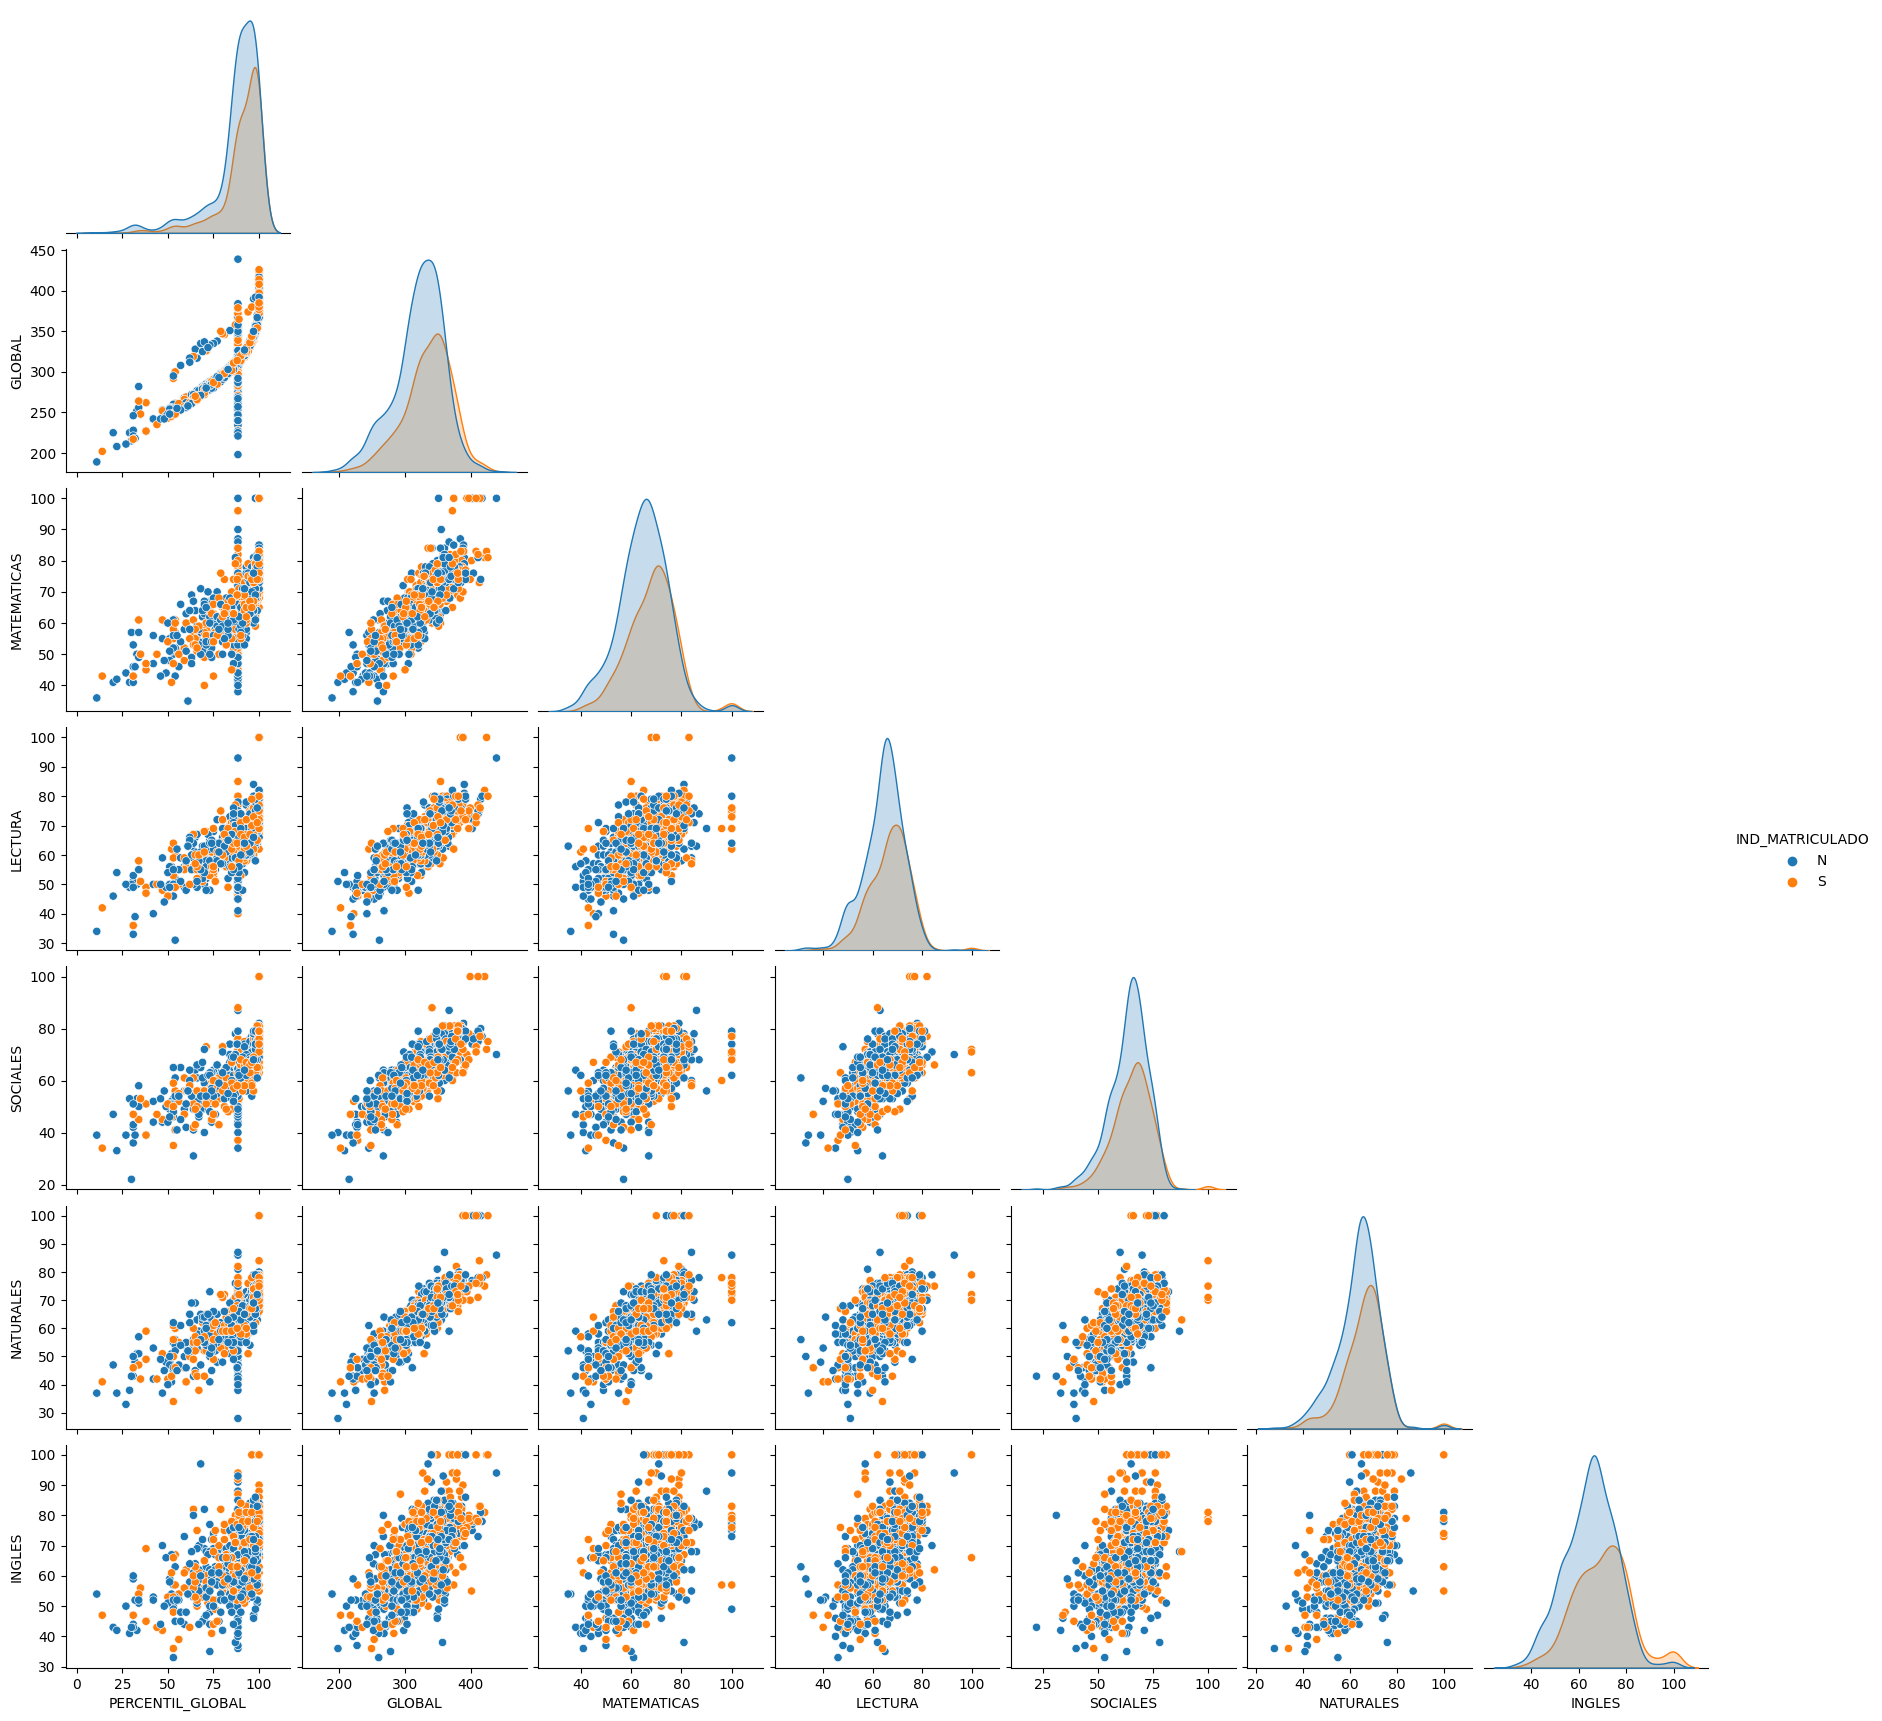

In [464]:
import seaborn as sns

sns.pairplot(geodf,hue = "IND_MATRICULADO", corner=True)

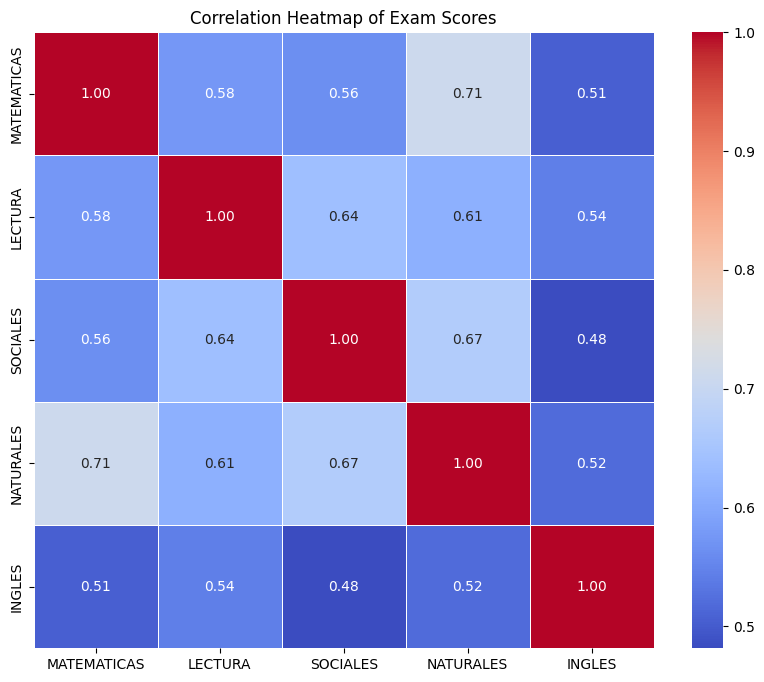

In [465]:

from matplotlib import pyplot as plt


plt.figure(figsize=(10, 8))
corr_matrix = geodf[['MATEMATICAS', 'LECTURA', 'SOCIALES', 'NATURALES', 'INGLES']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Exam Scores')
plt.show()

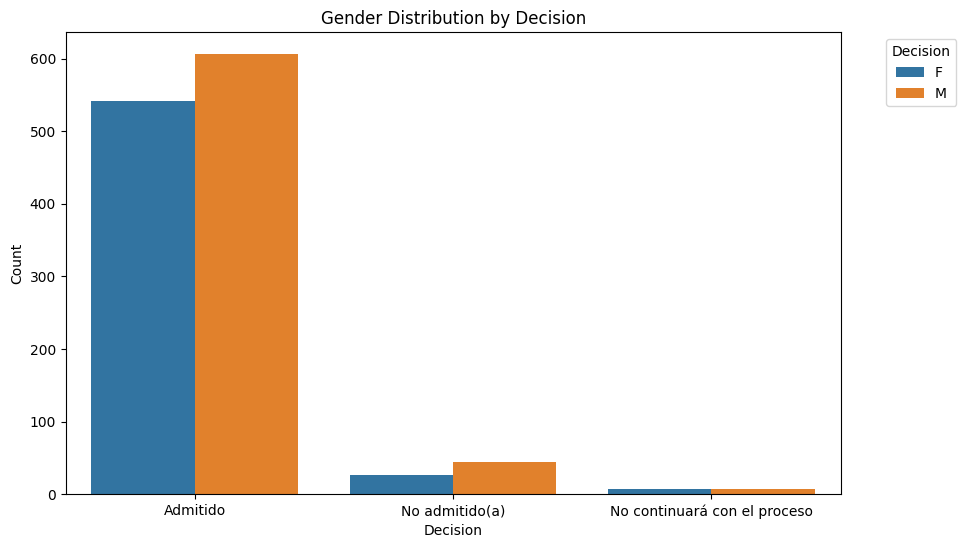

In [466]:

plt.figure(figsize=(10, 6))
sns.countplot(data=geodf, x='DESC_DECISION', hue='SEXO')
plt.title('Gender Distribution by Decision')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

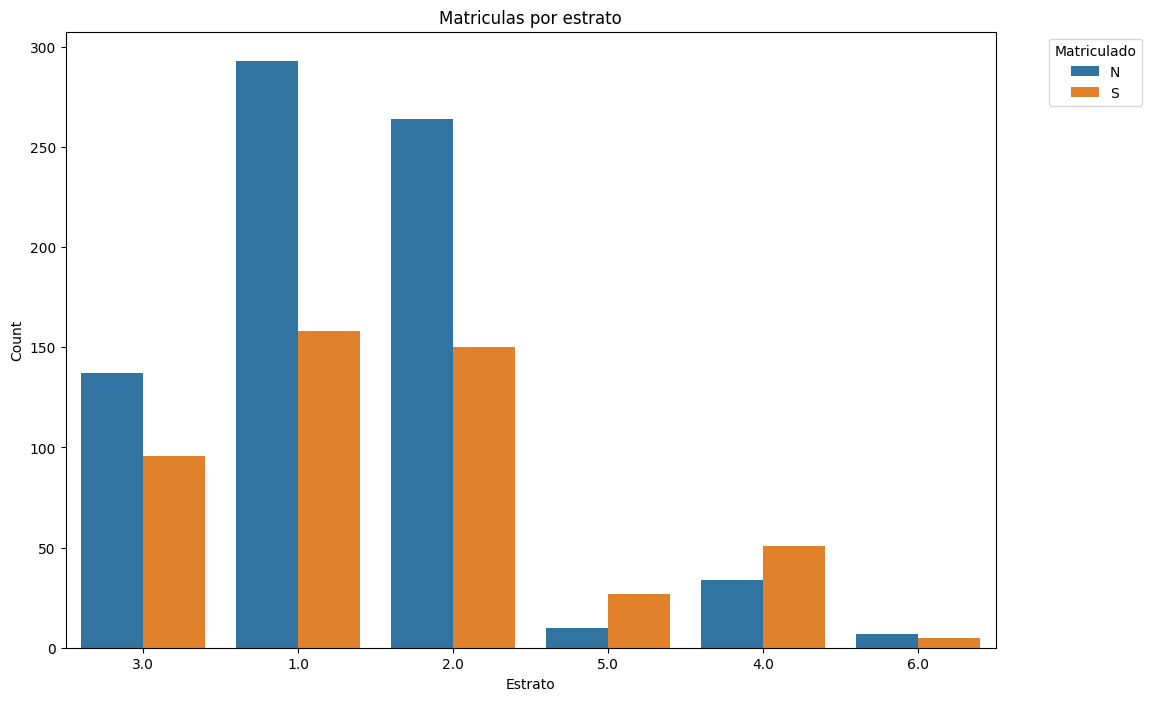

In [467]:
plt.figure(figsize=(12, 8))
sns.countplot(data=geodf, x='ESTRATO', hue='IND_MATRICULADO')
plt.title('Matriculas por estrato')
plt.xlabel('Estrato')
plt.ylabel('Count')
plt.legend(title='Matriculado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

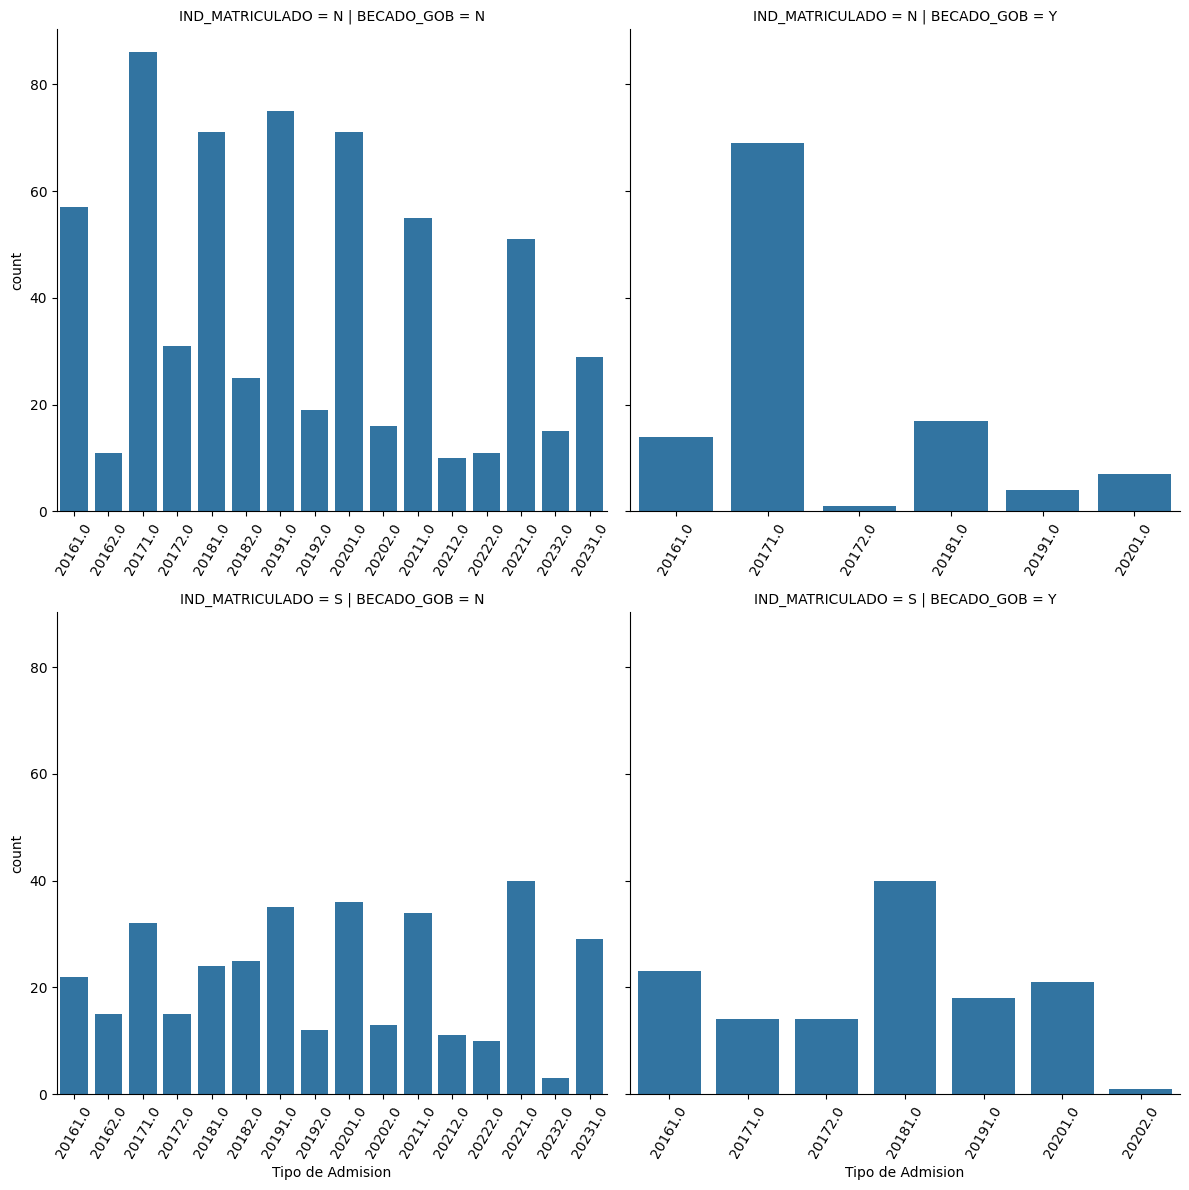

In [468]:
g=sns.FacetGrid(geodf, col="BECADO_GOB", row="IND_MATRICULADO", sharey=True, sharex=False, legend_out=True, height= 6)
g.map(sns.countplot, 'TASA')
g.set_axis_labels("Tipo de Admision")
g.set_xticklabels( rotation=60)
g.tight_layout()

Text(0.5, 1.0, 'Matriculados x Estrato Socioeconómico según asignación de Becas')

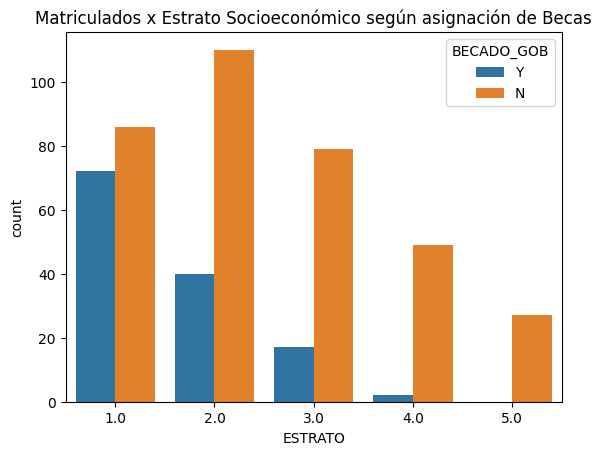

In [469]:
dfmat=geodf[geodf['IND_MATRICULADO']=='S'] #Segmento un nuevo DF solo para estudiantes matriculados
q=sns.countplot(data=dfmat, x='ESTRATO', hue='BECADO_GOB', order=['1.0','2.0','3.0','4.0', '5.0'])
q.set_title("Matriculados x Estrato Socioeconómico según asignación de Becas")

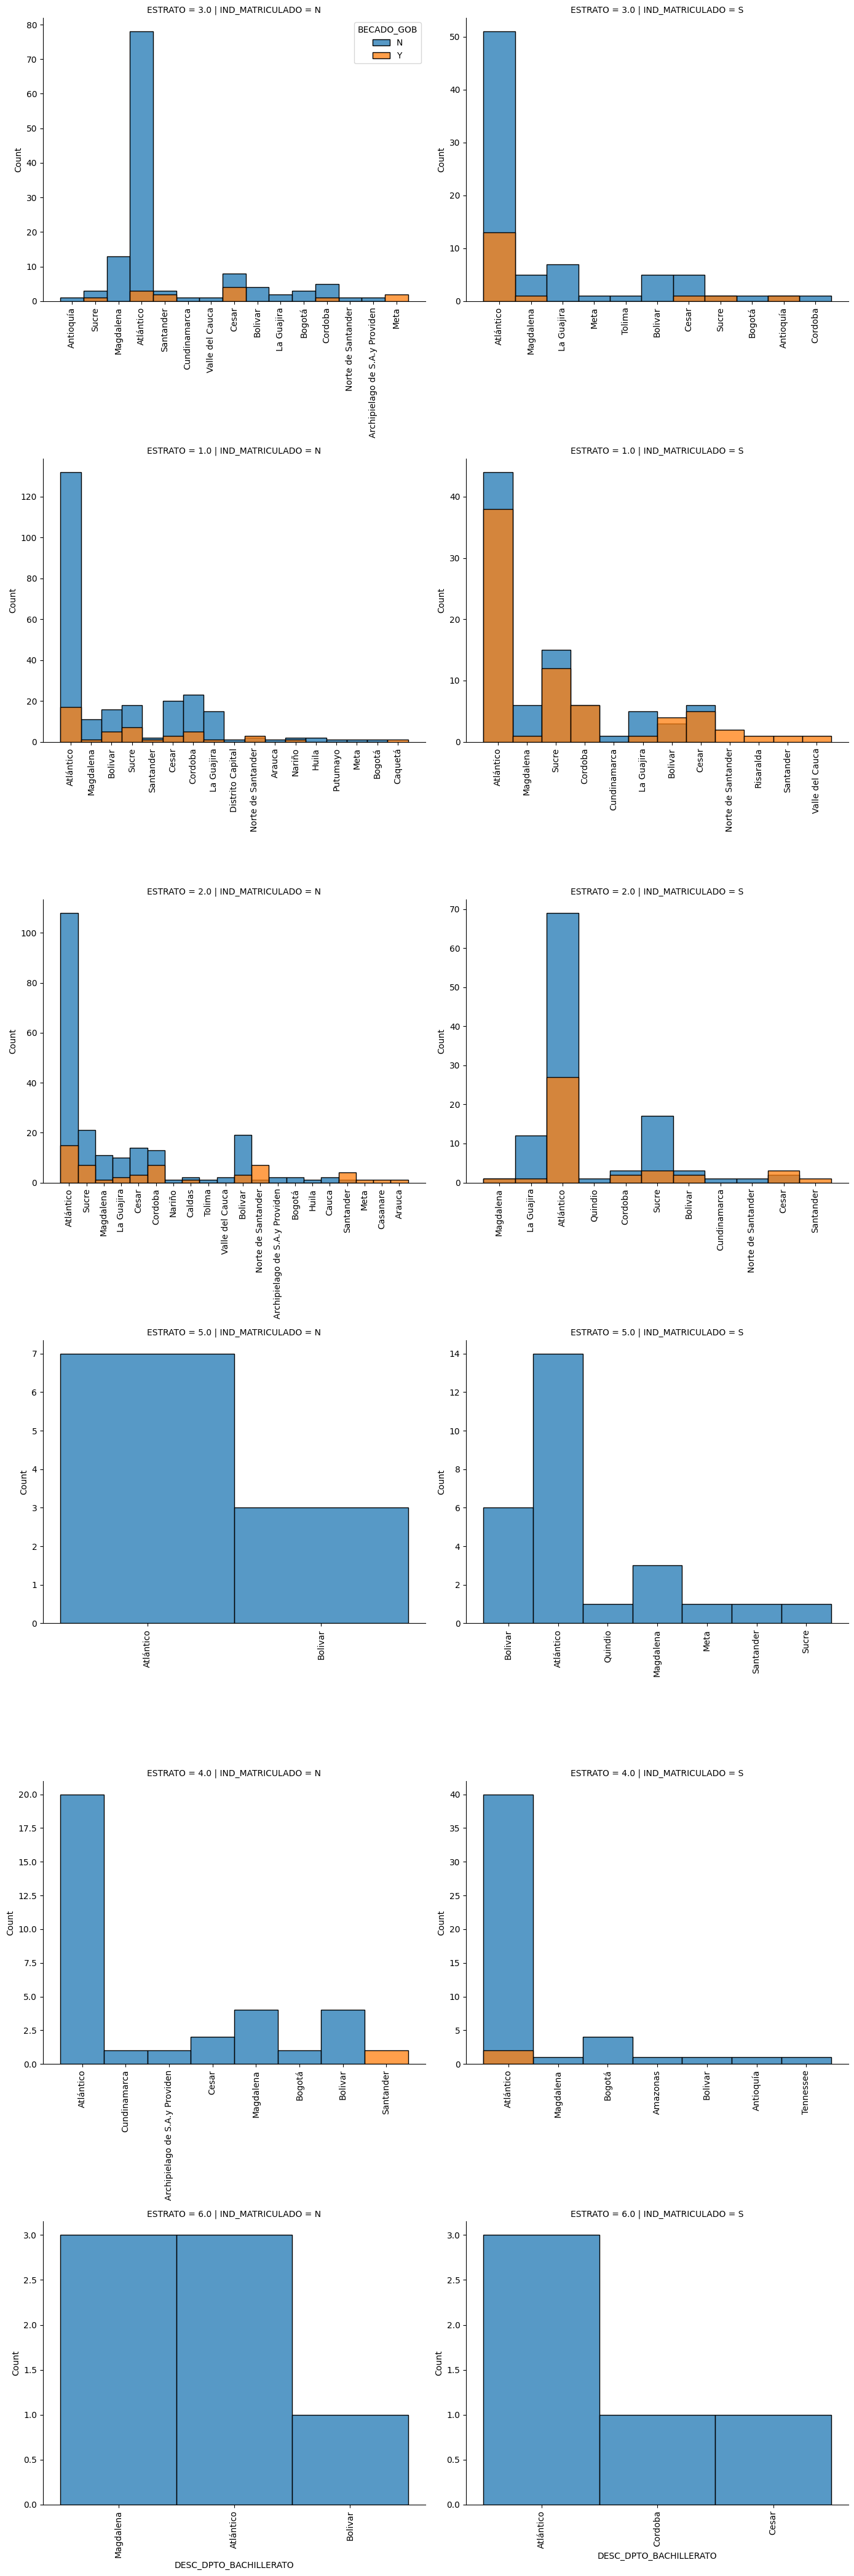

In [470]:
g=sns.FacetGrid(geodf, col="IND_MATRICULADO", row="ESTRATO", sharey=False, hue='BECADO_GOB', sharex=False, legend_out=False, height= 7)
g.map(sns.histplot, 'DESC_DPTO_BACHILLERATO')
g.set_xticklabels( rotation=90)
g.add_legend()
g.tight_layout()

## Feature Engineering (Balanceo de clases SMOTE y One Hot Encoding)

Aplicando One-Hot Encoder

In [471]:
ndf=geodf #Duplico el dataset
Y=ndf['IND_MATRICULADO']
ndf.drop('IND_MATRICULADO', axis=1, inplace=True)


In [474]:
col_onehot=['DISCAPACIDAD', 'IND_COMPLETA', 'IND_ACEPTADA', 'Ind_Sol_01_69_75',
       'SEXO', 
       'DESC_DPTO1', 'DESC_MUNICIPIO1', 'DESC_PAIS1',
       'ESTADO_SOLICITUD', 'TIPO_ESTUDIANTE',
       'ESTRATO', 'DESC_BACHILLERATO', 'CIUDAD_BACHILLERATO',
       'DESC_DPTO_BACHILLERATO', 'DESC_PAIS_BACHILLERATO', 
       'COLEGIO_PRIVADO', 'COLEGIO_BILINGUE',
       'DESC_DECISION','PAGO_01_02',
       'CIUDAD_NACIMIENTO', 'DPTO_NACIMIENTO', 'PAIS_NACIMIENTO',
       'PAIS_NACIONALIDAD', 'IDIOMA_NATIVO', 'GRUPO_ETNICO', 'BECADO_GOB']

In [475]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(drop='first')

encoded_data = encoder.fit_transform(ndf[col_onehot])
encoded_columns = encoder.get_feature_names_out(input_features=col_onehot)
encoded = pd.DataFrame(encoded_data.toarray())


In [476]:
ndf.drop(col_onehot,axis=1,inplace=True)

In [478]:
ndf=pd.concat([ndf.reset_index(drop=True), encoded], axis=1)

Tecnica SMOTE

## Implementacion de modelos

## Implementacion modelo del artículo

## Tablas de Error - Evaluación de modelos

### Redactar Secciones Titulo, Resumen y Metología 